In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
# Files to Load
file = "Resources/crash_weather_full2.csv"
original = "Resources/crash_weather_full.csv"

In [3]:
# Read the csv file and store into Pandas DataFrame
combined_df = pd.read_csv(file)
combined_df.head()

,tamainid,location_description,road_feature,road_character,road_class,road_configuration,road_surface,road_conditions,light_condition,weather,...,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
0,10763.0,110 FEET FROM JAMES JACKSON AVE,NO SPECIAL FEATURE,"STRAIGHT,GRADE",LOCAL STREET,"TWO-WAY,DIVIDED,UNPROTECTED MEDIAN",SMOOTH ASPHALT,DRY,DARK - LIGHTED ROADWAY,CLOUDY,...,f,f,f,f,f,f,f,f,f,f
1,10766.0,NEAR .5 MILES S OF S NC 55 HWY,NO SPECIAL FEATURE,"STRAIGHT,LEVEL",NC ROUTE,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,WET,DAYLIGHT,RAIN,...,f,f,f,f,f,f,f,f,f,f
2,10781.0,.09 MILES FROM US-1 S,NO SPECIAL FEATURE,"STRAIGHT,LEVEL",US ROUTE,"TWO-WAY,DIVIDED,POSITIVE MEDIAN BARRIER",SMOOTH ASPHALT,DRY,DARK - LIGHTED ROADWAY,CLEAR,...,f,f,f,f,f,f,f,f,f,f
3,10803.0,250 FEET FROM PVA 201 CROSSROADS BLVD,"DRIVEWAY, PUBLIC","STRAIGHT,LEVEL",PUBLIC VEHICULAR AREA,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,DRY,DARK - LIGHTED ROADWAY,CLEAR,...,f,f,f,f,f,f,f,f,f,f
4,10809.0,250 FEET FROM SR1415,NO SPECIAL FEATURE,"STRAIGHT,GRADE",STATE SECONDARY ROUTE,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,...,f,f,f,f,f,f,f,f,f,f


In [4]:
# Rename Column Titles
update = combined_df.rename(columns={'road_feature': 'Road Feature', 'road_class': 'Road Class',
                                     'location_description': 'Location', 'road_configuration': 'Configuration',
                                     'road_character': 'Character', 'road_surface': 'Surface',
                                     'light_condition': 'Light Condition','road_conditions': 'Road Condition',
                                     'tamainid': 'ID','traffic_control': 'Traffic Control','weather': 'Weather',
                                     'lat': 'Latitude','lon': 'Longitude','lat2': 'Latitude2','lon2': 'Longitude2',
                                     'fatality': 'Fatalities','injury': 'Injuries','date': 'Date'})
update.head()

,ID,Location,Road Feature,Character,Road Class,Configuration,Surface,Road Condition,Light Condition,Weather,...,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
0,10763.0,110 FEET FROM JAMES JACKSON AVE,NO SPECIAL FEATURE,"STRAIGHT,GRADE",LOCAL STREET,"TWO-WAY,DIVIDED,UNPROTECTED MEDIAN",SMOOTH ASPHALT,DRY,DARK - LIGHTED ROADWAY,CLOUDY,...,f,f,f,f,f,f,f,f,f,f
1,10766.0,NEAR .5 MILES S OF S NC 55 HWY,NO SPECIAL FEATURE,"STRAIGHT,LEVEL",NC ROUTE,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,WET,DAYLIGHT,RAIN,...,f,f,f,f,f,f,f,f,f,f
2,10781.0,.09 MILES FROM US-1 S,NO SPECIAL FEATURE,"STRAIGHT,LEVEL",US ROUTE,"TWO-WAY,DIVIDED,POSITIVE MEDIAN BARRIER",SMOOTH ASPHALT,DRY,DARK - LIGHTED ROADWAY,CLEAR,...,f,f,f,f,f,f,f,f,f,f
3,10803.0,250 FEET FROM PVA 201 CROSSROADS BLVD,"DRIVEWAY, PUBLIC","STRAIGHT,LEVEL",PUBLIC VEHICULAR AREA,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,DRY,DARK - LIGHTED ROADWAY,CLEAR,...,f,f,f,f,f,f,f,f,f,f
4,10809.0,250 FEET FROM SR1415,NO SPECIAL FEATURE,"STRAIGHT,GRADE",STATE SECONDARY ROUTE,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,...,f,f,f,f,f,f,f,f,f,f


In [5]:
# Add Value Column
update['Value'] = 1
update

,ID,Location,Road Feature,Character,Road Class,Configuration,Surface,Road Condition,Light Condition,Weather,...,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog,Value
0,10763.0,110 FEET FROM JAMES JACKSON AVE,NO SPECIAL FEATURE,"STRAIGHT,GRADE",LOCAL STREET,"TWO-WAY,DIVIDED,UNPROTECTED MEDIAN",SMOOTH ASPHALT,DRY,DARK - LIGHTED ROADWAY,CLOUDY,...,f,f,f,f,f,f,f,f,f,1
1,10766.0,NEAR .5 MILES S OF S NC 55 HWY,NO SPECIAL FEATURE,"STRAIGHT,LEVEL",NC ROUTE,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,WET,DAYLIGHT,RAIN,...,f,f,f,f,f,f,f,f,f,1
2,10781.0,.09 MILES FROM US-1 S,NO SPECIAL FEATURE,"STRAIGHT,LEVEL",US ROUTE,"TWO-WAY,DIVIDED,POSITIVE MEDIAN BARRIER",SMOOTH ASPHALT,DRY,DARK - LIGHTED ROADWAY,CLEAR,...,f,f,f,f,f,f,f,f,f,1
3,10803.0,250 FEET FROM PVA 201 CROSSROADS BLVD,"DRIVEWAY, PUBLIC","STRAIGHT,LEVEL",PUBLIC VEHICULAR AREA,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,DRY,DARK - LIGHTED ROADWAY,CLEAR,...,f,f,f,f,f,f,f,f,f,1
4,10809.0,250 FEET FROM SR1415,NO SPECIAL FEATURE,"STRAIGHT,GRADE",STATE SECONDARY ROUTE,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,...,f,f,f,f,f,f,f,f,f,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,f,f,f,f,f,f,f,f,f,1
30192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,f,f,t,f,f,f,f,f,f,1
30193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,f,f,t,f,f,f,t,f,f,1
30194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,f,f,f,f,f,f,f,f,f,1


In [20]:
# Group together same Lighting Conditions to reflect in "Value" column
new_df = update.groupby('Light Condition').sum().reset_index()
new_df.head()

,Light Condition,ID,Latitude,Longitude,Longitude2,Latitude2,Fatalities,Injuries,numpassengers,numpedestrians,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,Value
0,DARK - LIGHTED ROADWAY,94203812.0,49952.115498,-109994.096349,-8.593052e+07,6.691883e+07,7.0,658.0,2134.0,28.0,166741.8,239336.0,603.88,57.99,79.51,20690.54,3599
1,DARK - ROADWAY NOT LIGHTED,20797430.0,12663.944000,-27898.094354,-7.811196e+07,3.986796e+07,5.0,156.0,402.0,10.0,38332.5,54367.3,161.09,16.19,22.83,4656.89,801
2,DARK - UNKNOWN LIGHTING,1681754.0,966.456798,-2127.804150,-7.481023e+05,2.069216e+06,0.0,8.0,20.0,1.0,2601.9,3797.5,9.83,1.61,2.36,299.06,58
3,DAWN,4606934.0,2218.705674,-4885.961592,-1.549197e+06,2.074082e+06,1.0,25.0,112.0,2.0,7711.9,11152.2,26.34,1.62,4.33,996.56,164
4,DAYLIGHT,572408846.0,278381.186254,-613105.899215,-1.269911e+09,6.352617e+08,18.0,3940.0,14248.0,112.0,1139400.6,1594943.3,3090.34,367.44,308.59,125537.29,21489


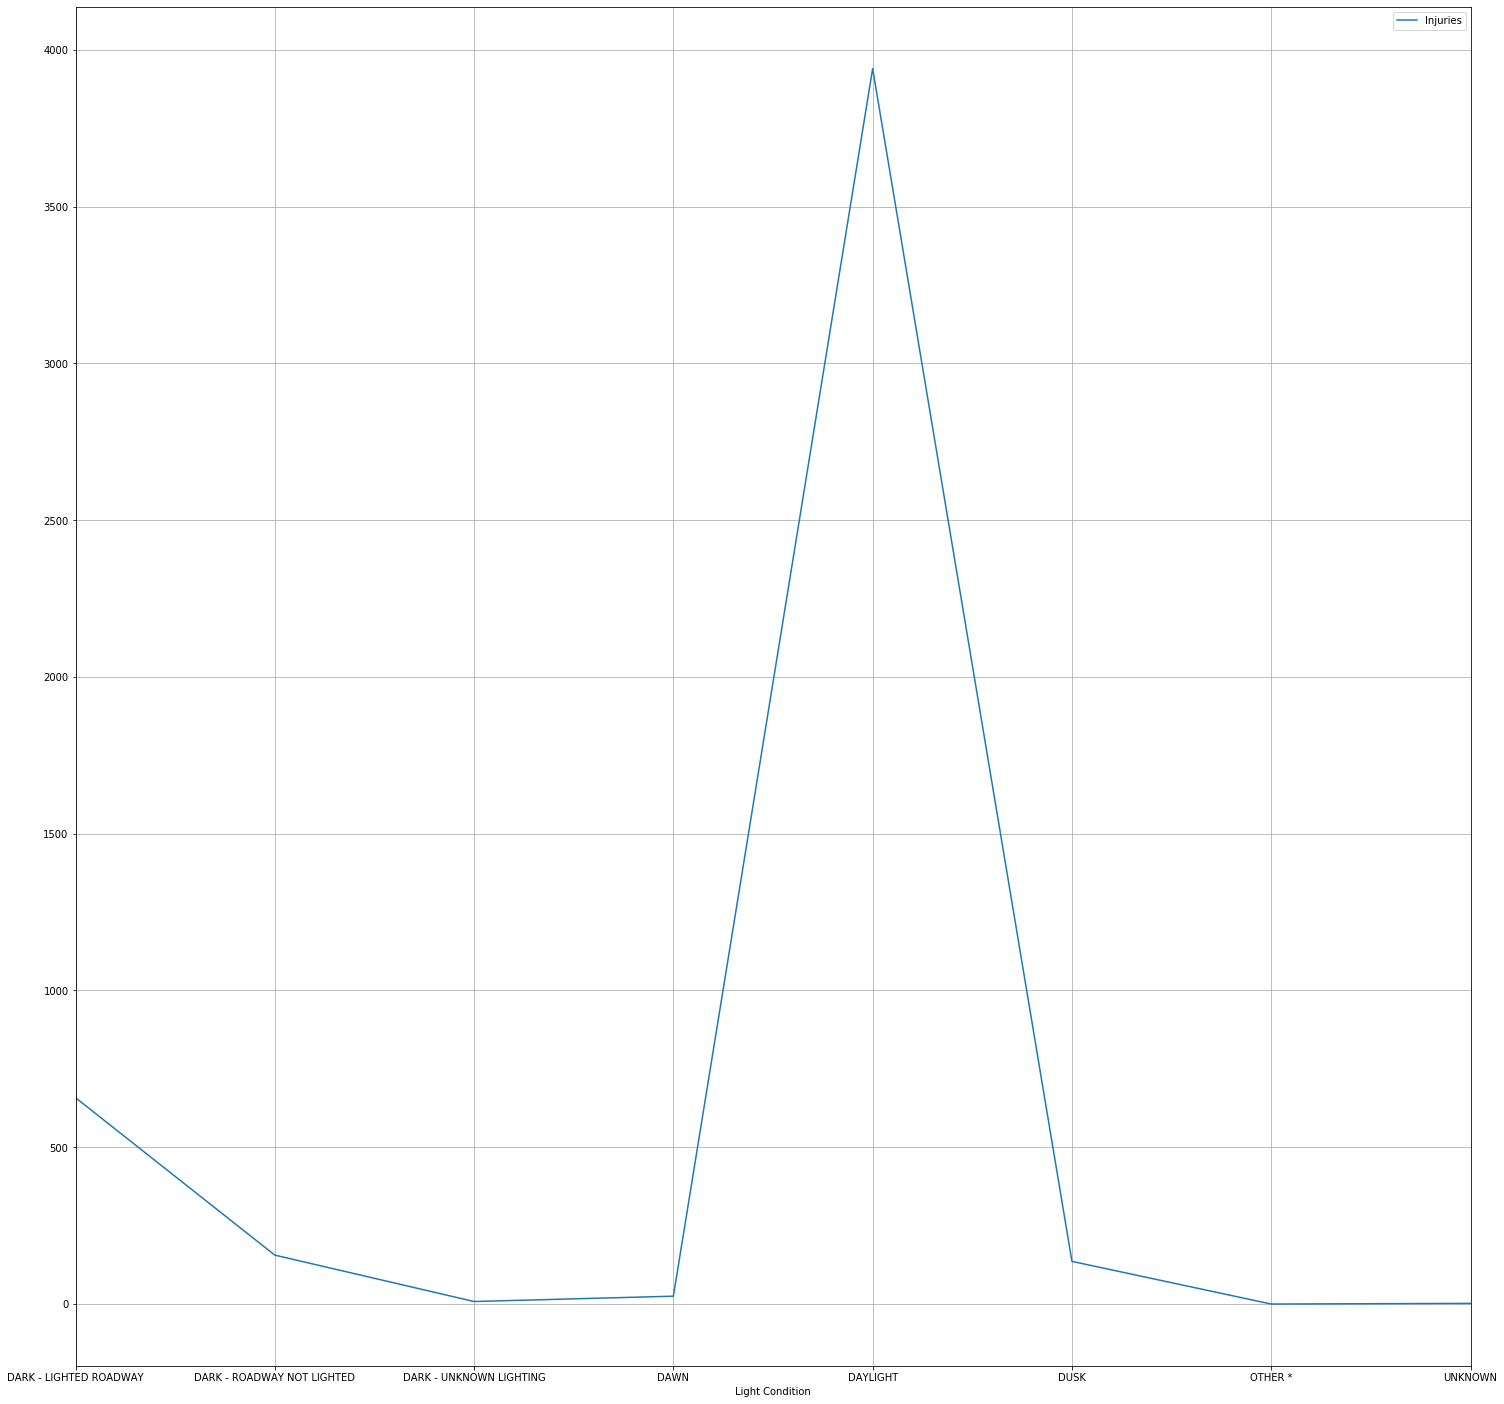

In [26]:
# Plot Data
new_df.plot(x='Light Condition', y='Injuries', grid=True, figsize=(25,25)  )

''

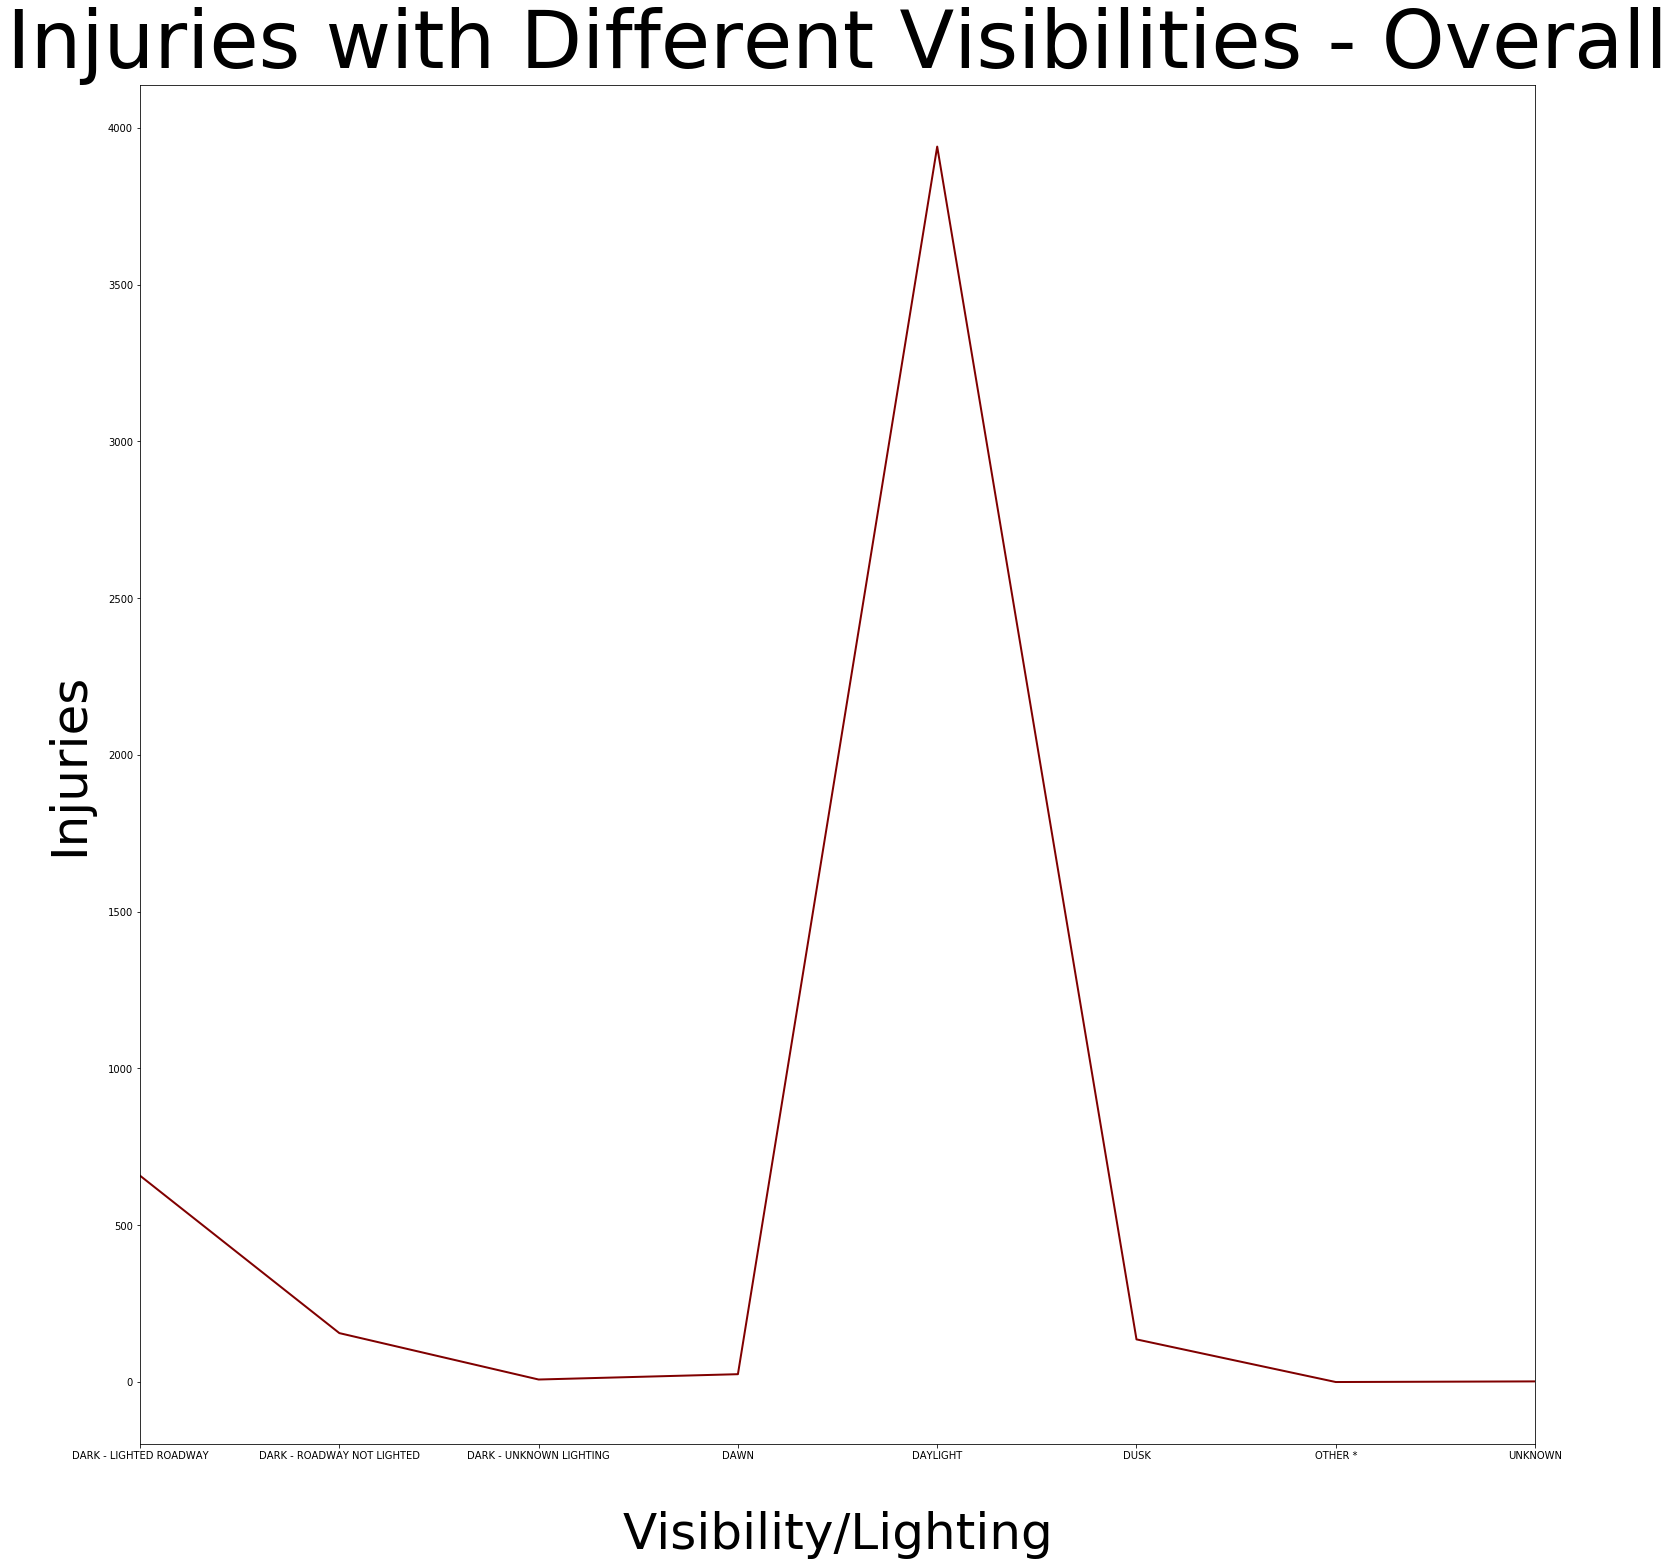

In [34]:
# Modify Text and Font Sizes
new_df.set_index('Light Condition')['Injuries'].plot(figsize=(25, 25), linewidth=2, color='maroon')
plt.xlabel("Visibility/Lighting", labelpad=50, fontsize=50)
plt.ylabel("Injuries", labelpad=15, fontsize=50)
plt.title("Injuries with Different Visibilities - Overall", y=1, fontsize=80)
;